## Загрузка данных

Импортируются необходимые для работы библиотеки

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from itertools import combinations
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)

Загружаются данные

In [ ]:
data = pd.read_csv('/datasets/gym_churn.csv')
data.columns = data.columns.str.lower()
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


Можно сделать вывод, что пропуски отсутсвуют, и данные имеют корректный тип

## Проведение исследовательского анализа данных (EDA)

Рассмотрим датасет

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


Можно сделать следующие выводы:
- Распределение по полу примерно одинаково (~50%)
- Большинство клиентов (84,5%) живет или работает рядом с фитнес-клубом
- чуть меньше половины клиентов являются сотрудниками партнерских организаций
- ~ 30% клиентов пришли по программе "Приведи друга"
- Известны мобильные номера ~ 90% клиентов
- Средняя длительность абонементов клиентов - 4.7 месяцев
- ~ 40% клиентов посещают групповые занятия
- Средний возраст клиентов - 29 лет
- Средния дополнительная выручка на клиента - 146
- Средний срок до окончания договора - 4.3 месяцев
- Среднее время с момента первого обращения в фитнес-центр - 3.7 месяцев
- Средняя частота посещений за все время - 1.87 раз в неделю
- Средняя частота посещений за последний месяц - 1.76 раз в неделю
- Доля оттока - 26,5%

In [ ]:
data.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


По признаку оттока можно сделать следующие выводы:
- Распределение по полу примерно одинаково
- Ближе живущие или работающие клиенты реже попадают в отток
- Сотрудники компаний-партнеров реже перестают посещать фитнесс-клуб чем остальные клиенты
- Клиенты, пришедшие по акции "Приведи друга" в два раза реже уходят в отток
- Наличие мобильного номера клиента не отличается в группах
- Средняя длительность договора больше у оставшихся пользователей месяц
- Оставшиеся пользователи чаще ходят на групповые занятия
- Оставшиеся пользователи в среднем старше отточных на 3 года
- Оставшиеся пользователи прибыльнее по дополнительным расходам
- У клиентов в оттоке меньше среднее количество посещений в неделю за всё время
- Количество посещений в предыдущий месяц в два раза ниже у клиентов в оттоке

Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)

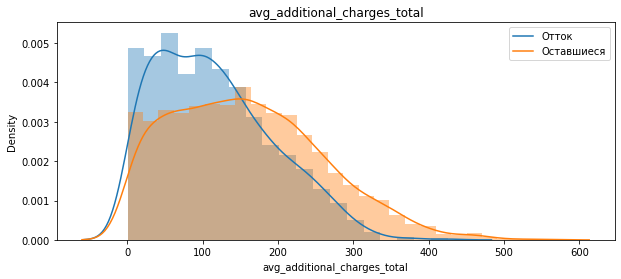

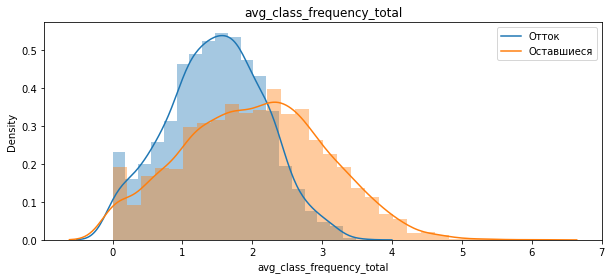

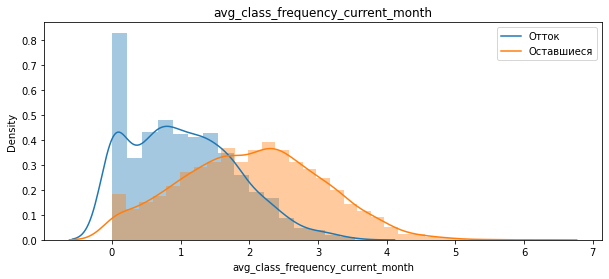

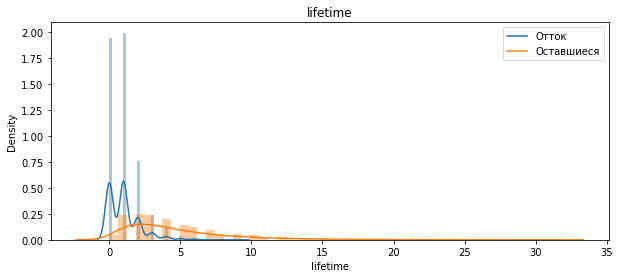

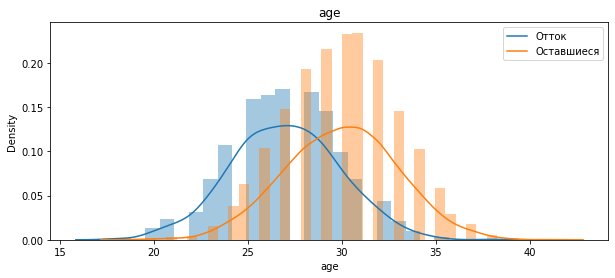

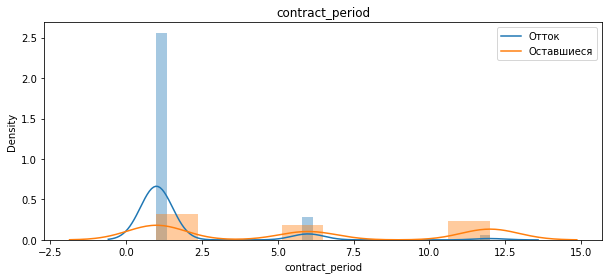

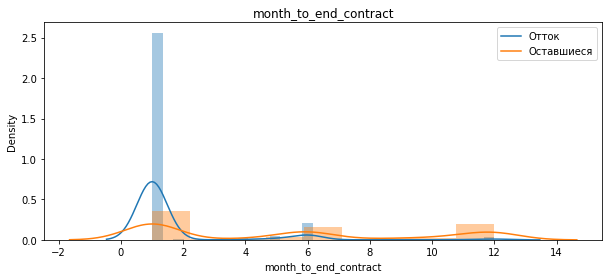

In [ ]:
churn = data[data['churn']==1]
unchurn = data[data['churn']==0]
distplot_columns = ['avg_additional_charges_total', 'avg_class_frequency_total',
                    'avg_class_frequency_current_month', 'lifetime', 'age',
                    'contract_period', 'month_to_end_contract']
for column in distplot_columns:
  plt.figure(figsize=(10,4))
  plt.title(column)
  sns.distplot(churn[column])
  sns.distplot(unchurn[column])
  plt.legend(['Отток', 'Оставшиеся'])
  plt.show()


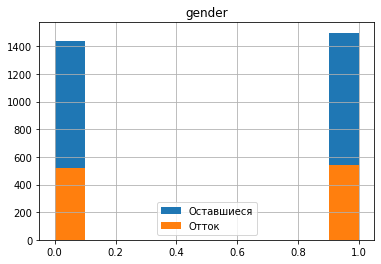

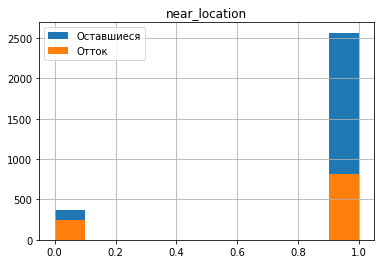

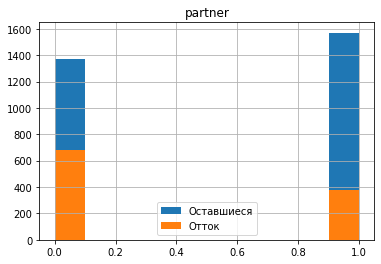

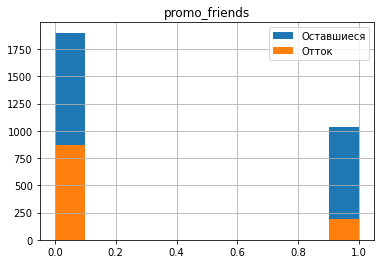

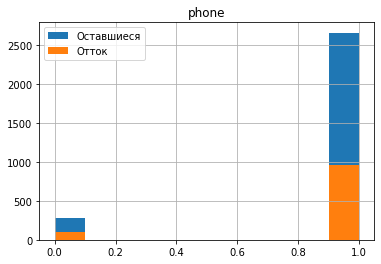

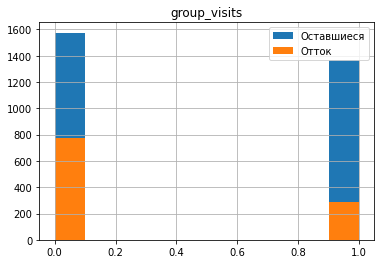

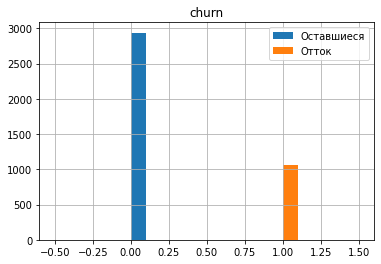

In [ ]:
for column in data.columns:
  if column not in distplot_columns:
    data.groupby('churn')[column].hist()
    plt.title(column)
    plt.legend(['Оставшиеся', 'Отток'])
    plt.show()

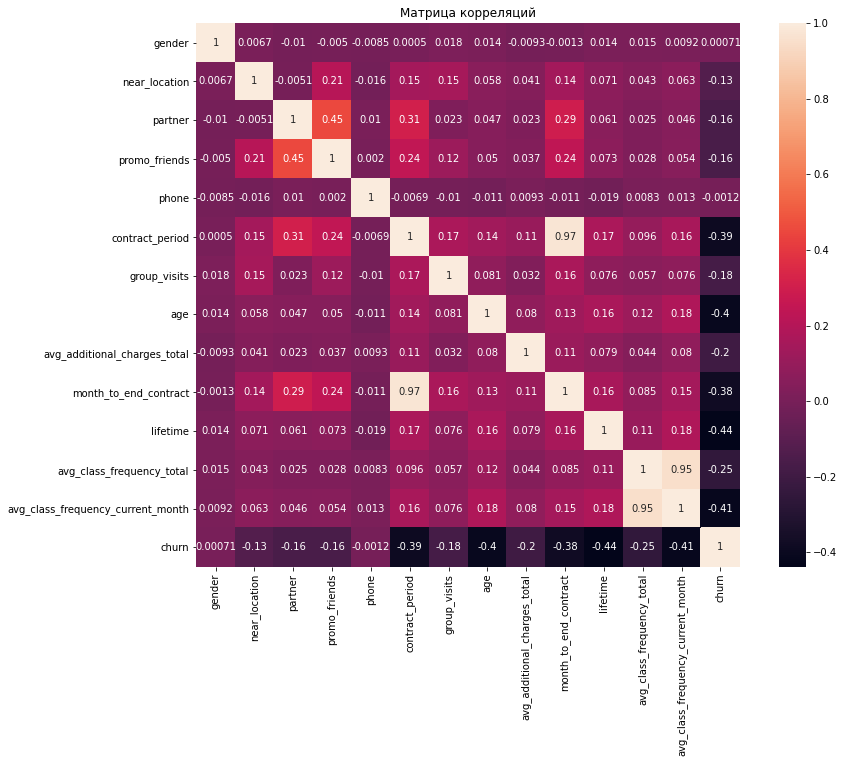

In [ ]:
cm = data.corr()
fig, ax = plt.subplots(figsize=(14,10))

#нарисуем тепловую карту с подписями для матрицы корреляций
sns.heatmap(cm, annot=True, square=True)
plt.title('Матрица корреляций')
plt.show()


На основе представленных выше графиков, можно сделать следующие выводы:
- очевидной зависимости оттока от признаков не обнаружено
- имеются два мультиколлинеарных признака - contract_period и month_to_end_contact

## Построение модели прогнозирования оттока клиентов

Постройтим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце.

Для это обучим модель на train-выборке двумя способами:
- логистической регрессией
- случайным лесом.

Оценим метрики accuracy, precision и recall для обеих моделей на валидационной выборке и сравним по ним модели.

In [ ]:
X = data.drop('churn', axis=1)
y = data['churn']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

In [ ]:
model_1 = LogisticRegression(solver='liblinear')


model_1.fit(X_train_st, y_train)


y_pred = model_1.predict(X_test_st)
print(
        'Accuracy:{:.2f} Precision:{:.2f} Recall:{:.2f}'.format(
            accuracy_score(y_test, y_pred) ,
            precision_score(y_test,y_pred),
            recall_score(y_test,y_pred)
        )
)

Accuracy:0.92 Precision:0.85 Recall:0.83


In [ ]:
model_2 = RandomForestClassifier(n_estimators = 100, random_state=0) #

model_2.fit(X_train_st, y_train)

y_pred = model_2.predict(X_test_st)
print(
        'Accuracy:{:.2f} Precision:{:.2f} Recall:{:.2f}'.format(
            accuracy_score(y_test, y_pred) ,
            precision_score(y_test,y_pred),
            recall_score(y_test,y_pred)
        )
)

Accuracy:0.92 Precision:0.84 Recall:0.81


Можно сделать вывод, что модель логистической регрессии показала себя лучше по всем критериям

## Кластеризация клиентов

Стандартизируем данные, построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуем дендрограмму

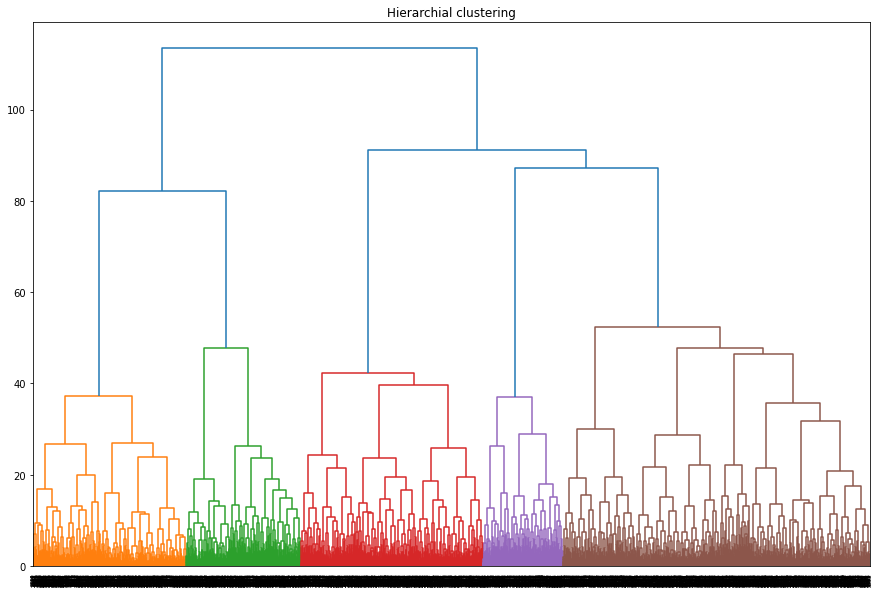

In [ ]:
sc = StandardScaler()
x_sc = sc.fit_transform(data)


linked = linkage(x_sc, method = 'ward')
plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering')
plt.show()

Видим, что выделены 5 кластеров

Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов

In [ ]:
km = KMeans(n_clusters=5, random_state=0)
labels = km.fit_predict(x_sc)

In [ ]:
data['cluster'] = labels

In [ ]:
data.groupby('cluster').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster,,,,,,,,,,,,,,
0,0.503676,0.000000,0.459559,0.075368,0.917279,2.069853,0.211397,28.522059,132.741216,1.950368,2.757353,1.706629,1.515890,0.450368
1,0.492829,0.936115,0.764016,0.534550,0.919166,10.447197,0.516297,29.962190,161.853561,9.477184,4.833116,2.788103,2.786919,0.007823
2,0.507917,1.000000,0.323995,0.213155,0.903776,1.546894,0.287454,26.926918,113.173051,1.500609,1.031669,1.449720,1.037592,0.961023
3,0.521186,0.996610,0.282203,0.208475,0.904237,1.882203,0.452542,30.237288,157.988625,1.794915,4.923729,2.203432,2.207359,0.003390
4,0.518895,0.968023,0.744186,0.526163,0.873547,8.859012,0.534884,29.728198,162.907495,8.155523,4.411337,0.957744,0.943967,0.024709


Характерные черты нулевого кластера:
- не находятся рядом с спортивным залом
- чуть меньше половины работают в фирмах-партнерах
- большинство начали посещать зал самостоятельно
- средняя длинна контракта - 2 месяца
- редко посещают групповые занятия - 1 из 5
- средний уровень дополнительных трат
- до окончания контракта осталось 2 месяца
- лафйтам составляет 2.75 месяца
- посещают 1,7 раз в неделю
- отток - 45%

Характерные черты первого кластера:
- находятся рядом с спортивным залом
- чуть больше 3/4 работают в фирмах-партнерах
- половина пришла в зал в компании
- средняя длинна контракта - 10 месяцев
- половина посещает групповые занятия
- высокий уровень дополнительных трат
- до окончания контракта осталось 9 месяца
- лафйтам составляет 4,8 месяца
- посещают 2,8 раз в неделю
- отток - 0,7%

Характерные черты второго кластера:
- находятся рядом с спортивным залом
- чуть меньше трети работают в фирмах-партнерах
- большинство начали посещать зал самостоятельно
- средняя длинна контракта - 1,5 месяцев
- треть посещает групповые занятия
- самый низкий уровень дополнительных трат
- до окончания контракта осталось 1,5 месяца
- лафйтам составляет 1 месяц
- посещают 1,4 раз в неделю
- отток - 96%

Характерные черты третьего кластера:
- находятся рядом с спортивным залом
- чуть больше четверти работают в фирмах-партнерах
- большинство начали посещать зал самостоятельно
- средняя длинна контракта - 1,8 месяцев
- половина посещает групповые занятия
- высокий уровень дополнительных трат
- до окончания контракта осталось 1,8 месяца
- лафйтам составляет 5 месяцев
- посещают 2,2 раза в неделю
- отток - 0,3%

Характерные черты четвертого кластера:
- находятся рядом с спортивным залом
- чуть больше 3/4 работают в фирмах-партнерах
- половина пришла в зал в компании
- средняя длинна контракта - 8 месяцев
- половина посещает групповые занятия
- самый высокий уровень дополнительных трат
- до окончания контракта осталось 8 месяца
- лафйтам составляет 4 месяцев
- реже посещают (менее раза в неделю)
- отток - 0,2%

## Выводы и рекоммендации

Исходя из данных, приведенных выше, можно сказать что работы менеджеров требуют клиенты из кластеров 0 и 2, так как у них самый большой процент оттока (45 и 96 процентов соответственно).

Клиентам из нулевого кластера достаточно тяжело - они не находятся рядом с залом и приходили заключать договор самостоятельно. Однако они имеют средний уровень трат и интерес к посещениям зала. Возможно следует ввести маркетинговую компанию групповых занятий, чтобы клиенты этого кластера находили знакомвста в зале, что бы их привязывало к посещению и уменьшало отток.

Клиенты из кластера 2 имеют очень большой процент оттока. Они меньше всех других кластеров тратят на доп услуги, ходят не очень часто и заключают как будто "пробные" договоры на малый срок. Их необходимо проработать, чтобы понять точки сопротивления, из-за которых клиенты не хотят "коммитить" и проработать замечания/обратную связь.